In [14]:
import pandas as pd
from pydataset import data
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pingouin as pg
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv('ETicaret.csv')

In [3]:
data.dtypes

Cinsiyet                                                                               object
Yaş                                                                                    object
Medeni Durum                                                                           object
Çalışma Durumu                                                                         object
Öğrenim Durumu                                                                         object
En Çok Satın Alınan Ürün Grubu                                                         object
e-alışveriş yapma sıklığı                                                              object
Aylık ortalama e-alışveriş tutarı                                                       int64
e-alışveriş deneyimi(yıl)                                                               int64
En son satın alınan ürün grubu                                                         object
Sitenin her yerini kolaylıkla gezebiliyorum.                

In [4]:
data.head()

,Cinsiyet,Yaş,Medeni Durum,Çalışma Durumu,Öğrenim Durumu,En Çok Satın Alınan Ürün Grubu,e-alışveriş yapma sıklığı,Aylık ortalama e-alışveriş tutarı,e-alışveriş deneyimi(yıl),En son satın alınan ürün grubu,...,Siteden sipariş ettiğim her ürün elime kısa zamanda ulaşır.,Siparişlerimi sitede ilan edip söz verdikleri şekilde göndermektedirler.,"Siparişini verdiğim ürünü, aynen teslim alabiliyorum.","Site, kredi kartımla ilgili bilgileri gizlilikle korumaktadır.",Sitedeki güvenlik öğeleri herkesin anlayabileceği şekildedir.,"Site, internet alışverişi davranışıma ilişkin bilgilerimi gizlilikle korumaktadır.",Siteye yöneltilen istekler anında cevaplanır.,Bir problemle karşılaşıldığında site anında çözüm için ilgilenir.,Site her zaman müşteri talep ve ihtiyaçlarına cevap vermeye isteklidir.,"Sitenin, iyi organize edilmiş bir tasarımı vardır."
0,Erkek,51,Evli,Kamu,Doktora,Elektronik,Ayda bir kez,500,6,Kitap,...,4,4,4,4,4,4,4,4,4,4
1,Erkek,21,Bekar,Öğrenci,Lisans,Elektronik,Ayda bir kez,300,5,Elektronik,...,4,5,5,5,5,5,4,4,4,4
2,Erkek,21,Bekar,Öğrenci,Lisans,Kitap,Ayda bir kez,300,5,Kitap,...,4,5,5,5,4,5,4,3,4,4
3,Kadın,33,Evli,Çalışmıyor,Lisans,Giyim,6 Ayda bir kez,200,1,Giyim,...,5,5,5,5,5,5,3,3,4,5
4,Erkek,26,Evli,Kamu,Lisans,Giyim,3 Ayda bir kez,300,2,Giyim,...,3,3,3,3,3,3,3,3,3,3


In [5]:
## Anket verisi ile ilgilendiğimiz için Cronbach's Alpha değeri bulmamız lazım.
## (Cronbach's Alpha=0,924>0,80 Olduğunda anket, yüksek derecede güvenilir demektir.)
guvenilirlik_verileri =data.iloc[:, 10:26]
cronbach_alpha = pg.cronbach_alpha(guvenilirlik_verileri)
print("Cronbach's Alpha:", cronbach_alpha)

Cronbach's Alpha: (0.9422605230359788, array([0.933, 0.951]))


## Demografik Sorular

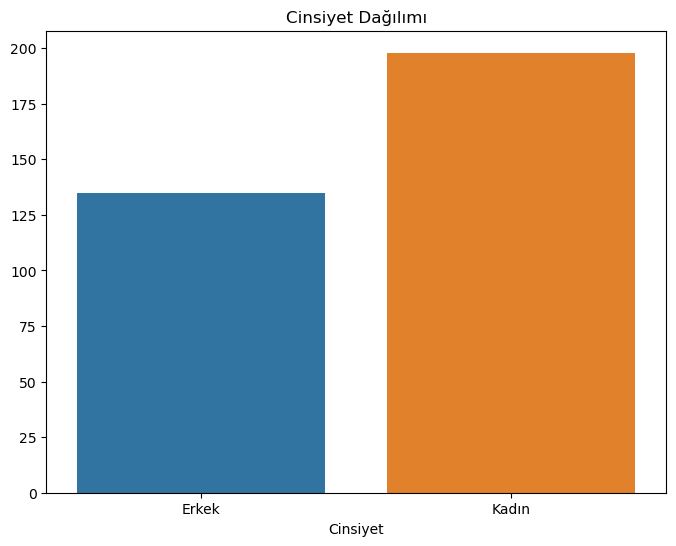

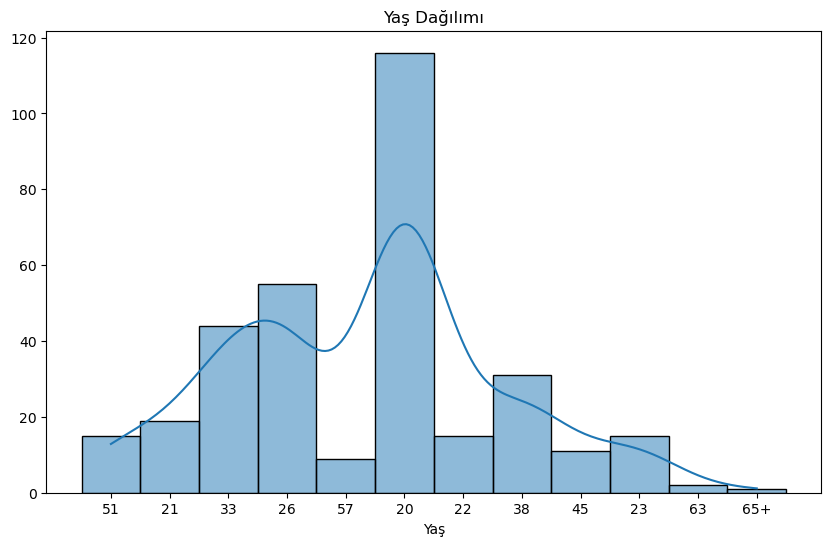

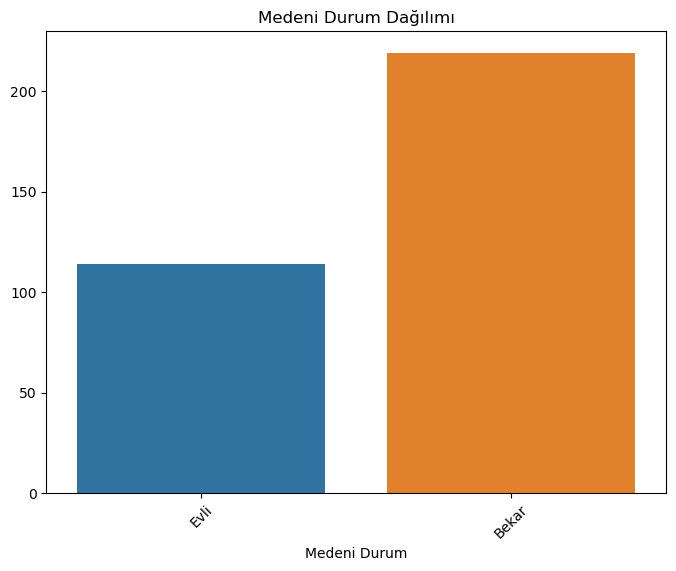

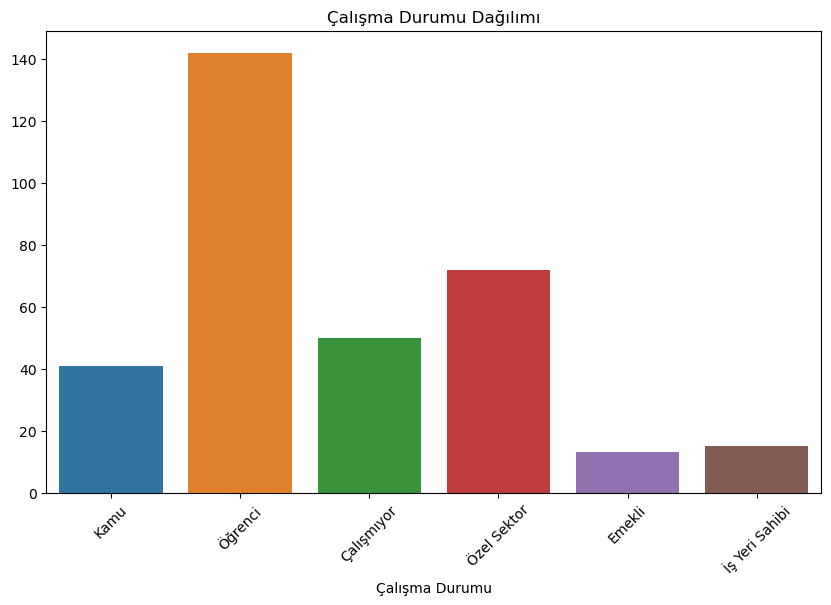

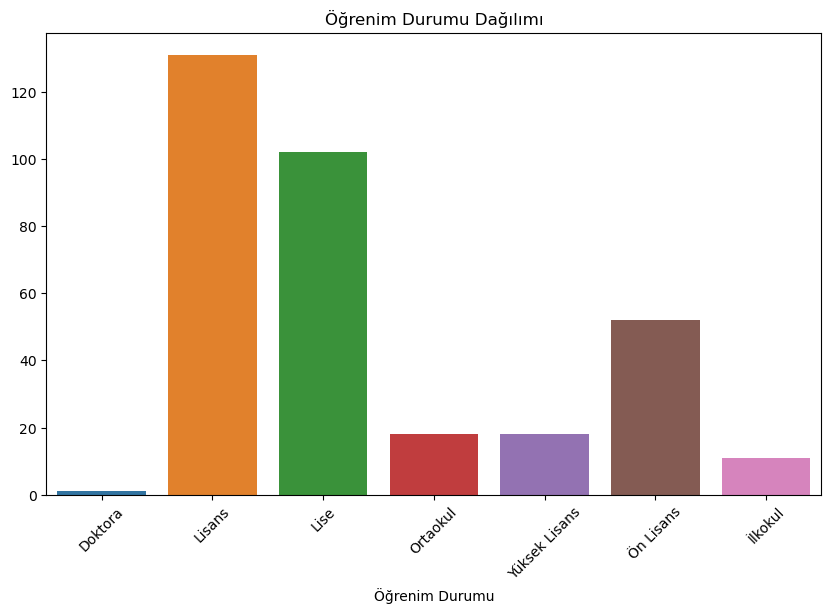

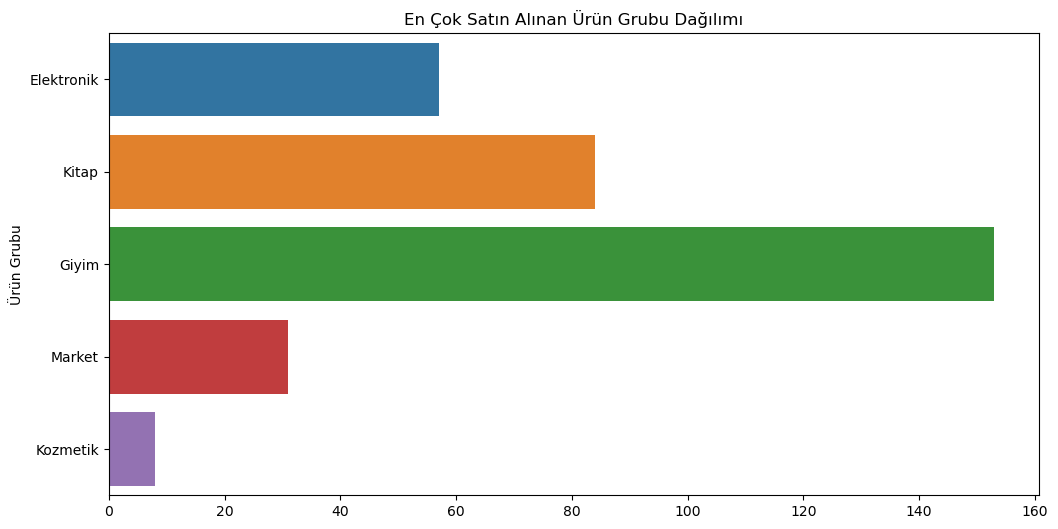

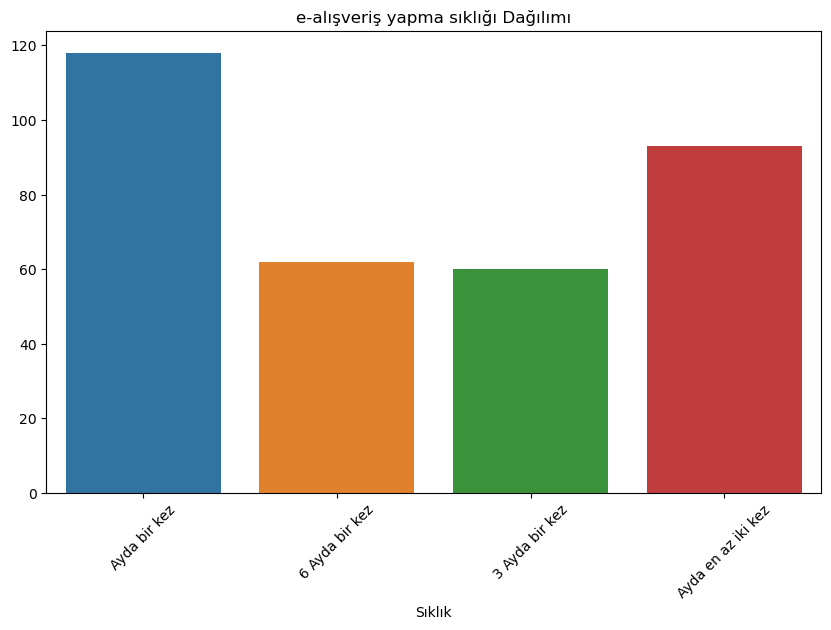

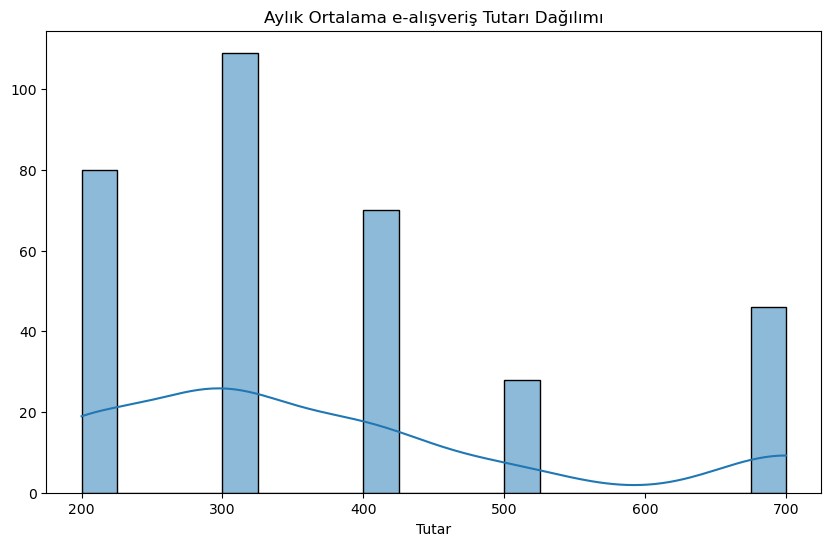

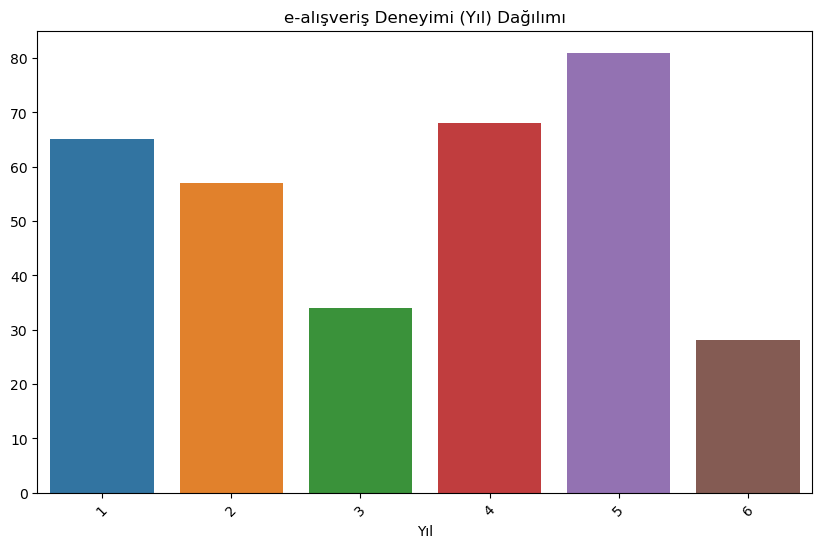

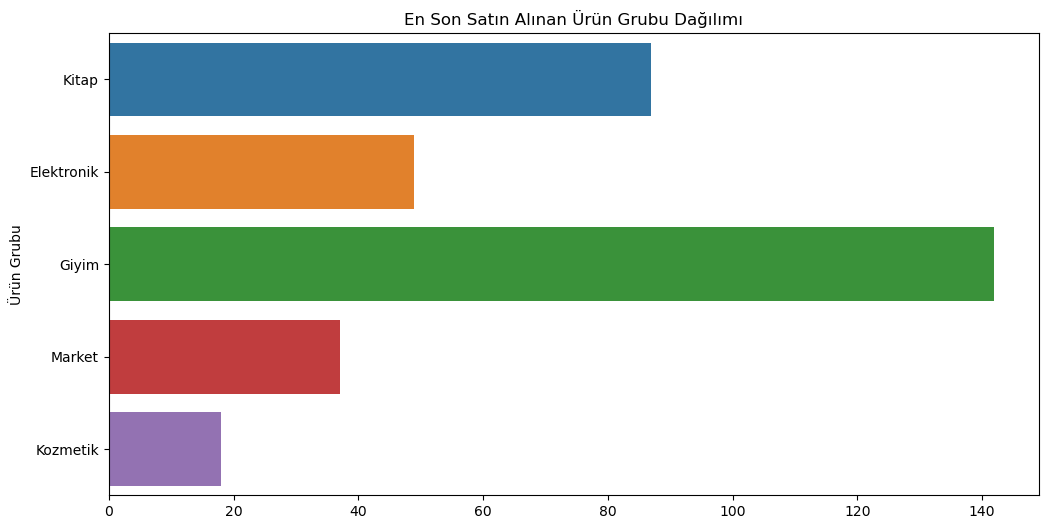

In [25]:
# Cinsiyet Dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x="Cinsiyet", data=data)
plt.title("Cinsiyet Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("")
plt.show()

# Yaş Dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data["Yaş"], bins=10, kde=True)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("")
plt.show()

# Medeni Durum Dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x="Medeni Durum", data=data)
plt.title("Medeni Durum Dağılımı")
plt.xlabel("Medeni Durum")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

# Çalışma Durumu Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x="Çalışma Durumu", data=data)
plt.title("Çalışma Durumu Dağılımı")
plt.xlabel("Çalışma Durumu")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

# Öğrenim Durumu Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x="Öğrenim Durumu", data=data)
plt.title("Öğrenim Durumu Dağılımı")
plt.xlabel("Öğrenim Durumu")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

# En Çok Satın Alınan Ürün Grubu Dağılımı
plt.figure(figsize=(12, 6))
sns.countplot(y="En Çok Satın Alınan Ürün Grubu", data=data)
plt.title("En Çok Satın Alınan Ürün Grubu Dağılımı")
plt.xlabel("")
plt.ylabel("Ürün Grubu")
plt.show()

# e-alışveriş yapma sıklığı Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x="e-alışveriş yapma sıklığı", data=data)
plt.title("e-alışveriş yapma sıklığı Dağılımı")
plt.xlabel("Sıklık")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

# Aylık Ortalama e-alışveriş Tutarı Dağılımı
plt.figure(figsize=(10, 6))
sns.histplot(data["Aylık ortalama e-alışveriş tutarı"], bins=20, kde=True)
plt.title("Aylık Ortalama e-alışveriş Tutarı Dağılımı")
plt.xlabel("Tutar")
plt.ylabel("")
plt.show()

# e-alışveriş Deneyimi (Yıl) Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(x="e-alışveriş deneyimi(yıl)", data=data)
plt.title("e-alışveriş Deneyimi (Yıl) Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("")
plt.xticks(rotation=45)
plt.show()

# En Son Satın Alınan Ürün Grubu Dağılımı
plt.figure(figsize=(12, 6))
sns.countplot(y="En son satın alınan ürün grubu", data=data)
plt.title("En Son Satın Alınan Ürün Grubu Dağılımı")
plt.xlabel("")
plt.ylabel("Ürün Grubu")
plt.show()

## Anket Soruları

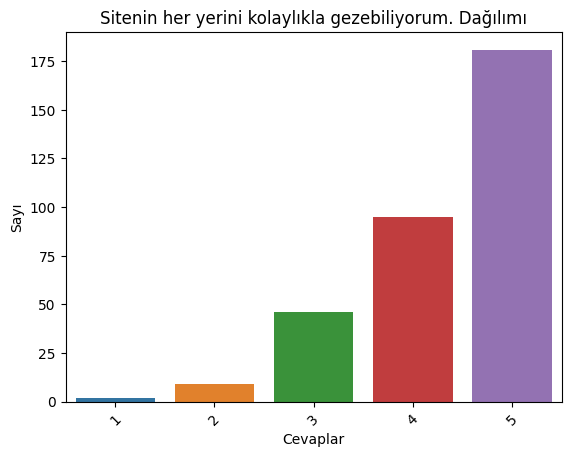

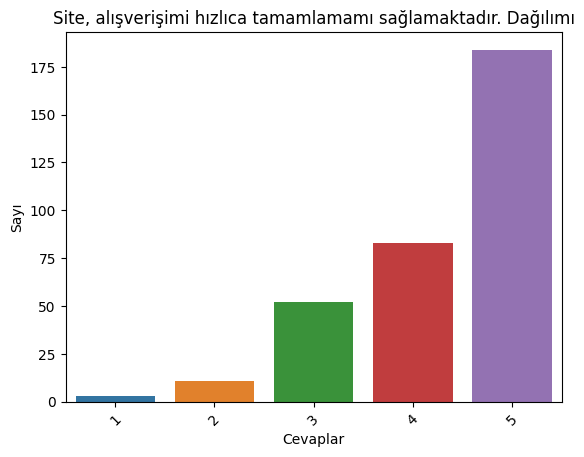

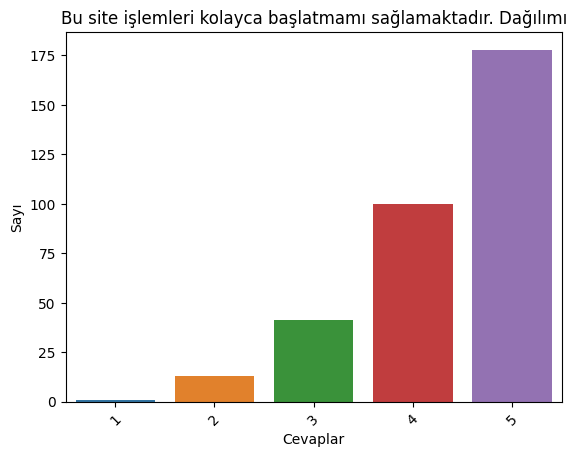

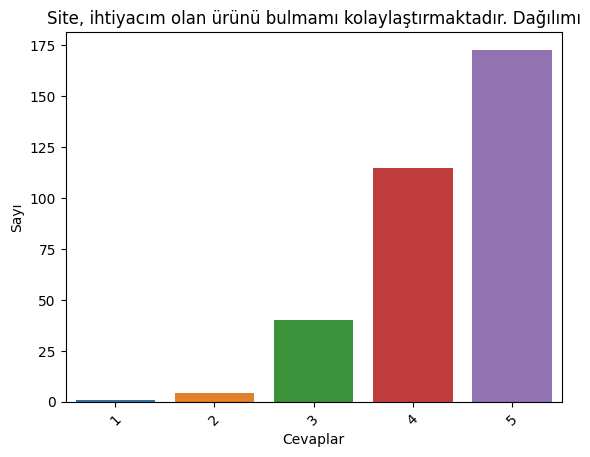

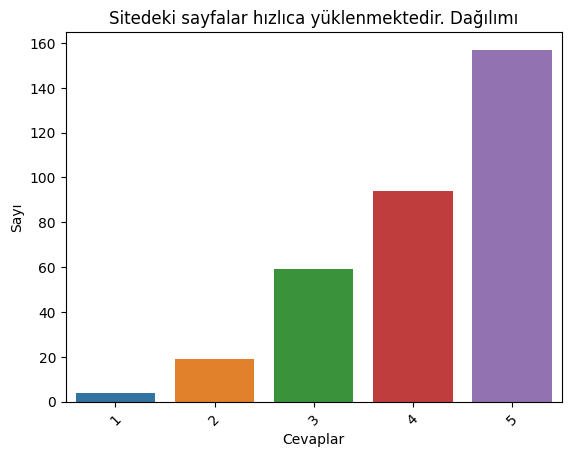

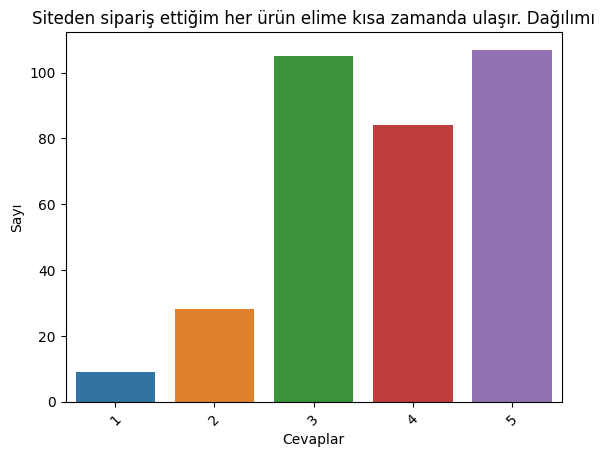

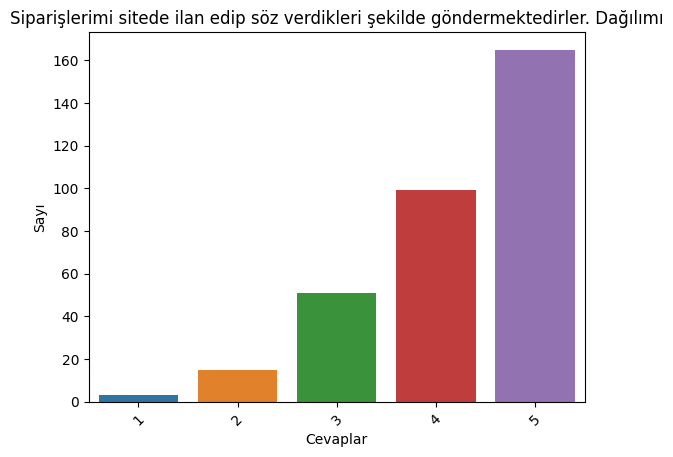

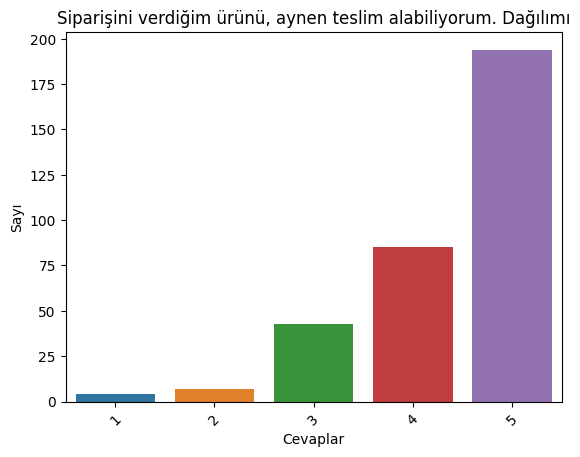

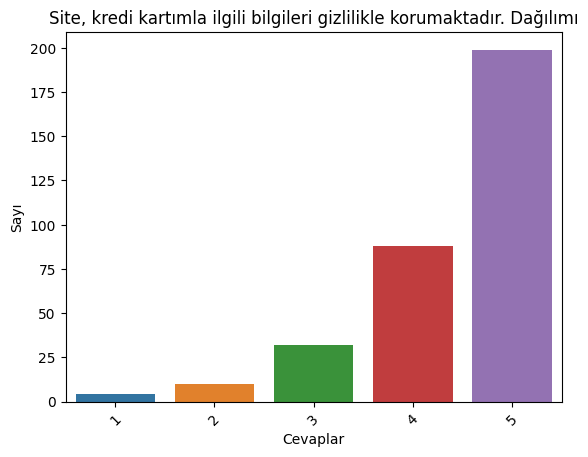

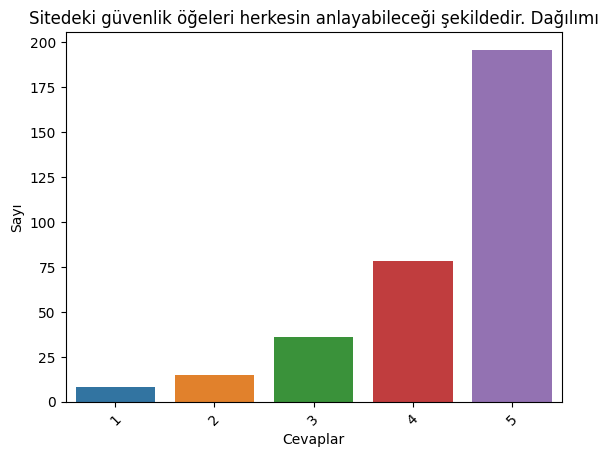

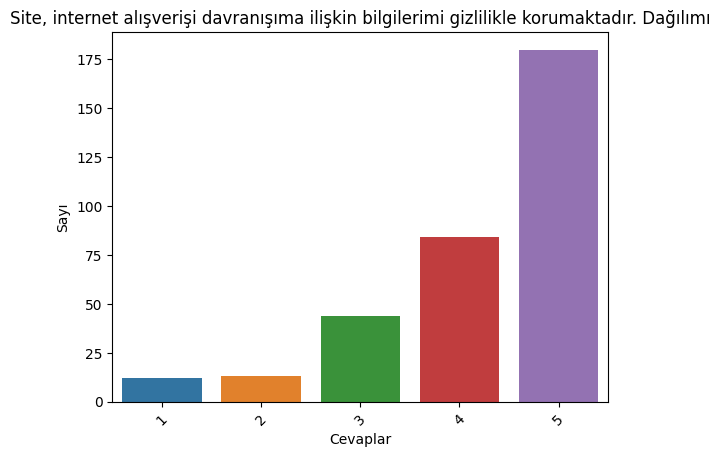

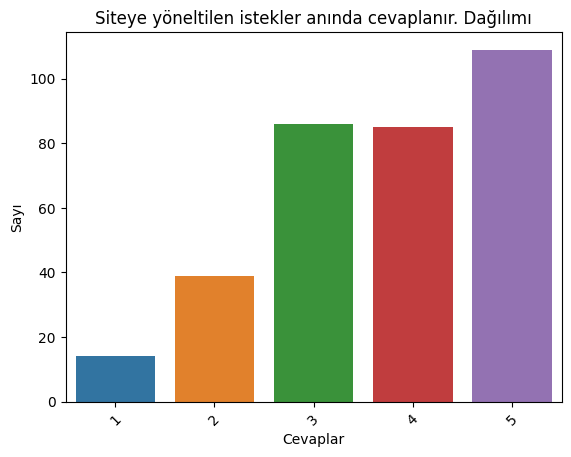

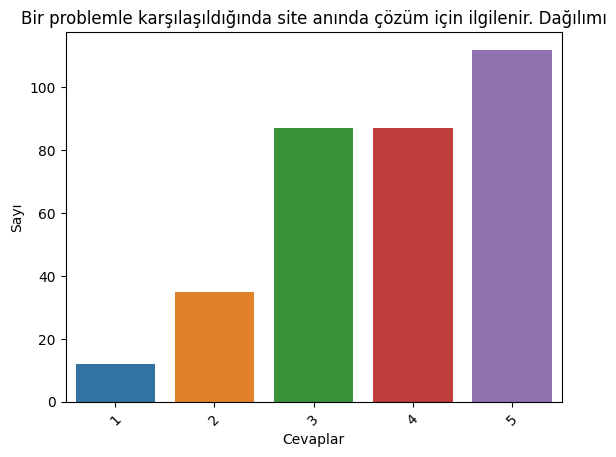

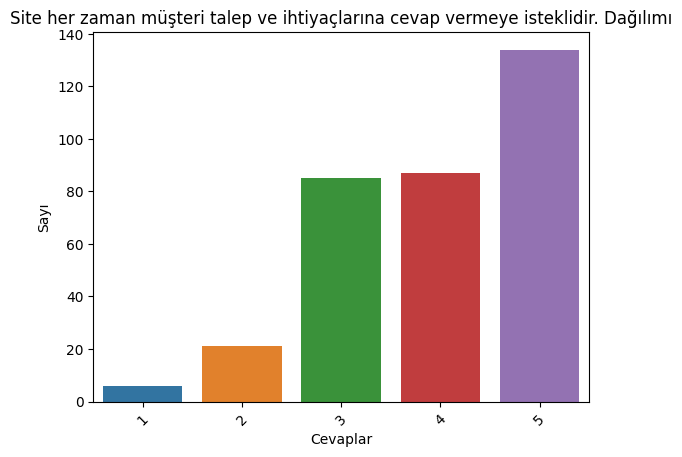

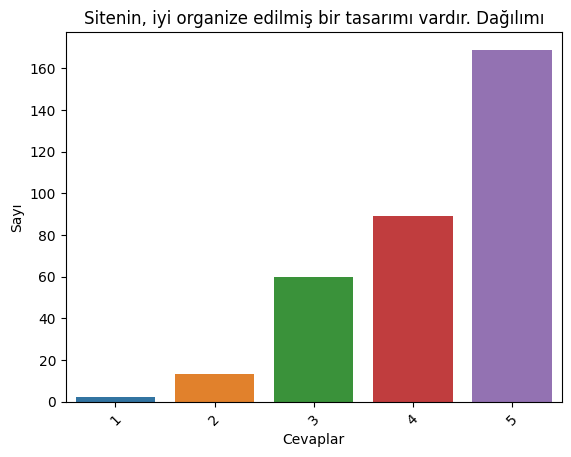

In [6]:
# Soru 1: Sitenin her yerini kolaylıkla gezebiliyorum.
soru_sutunu1 = data["Sitenin her yerini kolaylıkla gezebiliyorum. "]
sns.countplot(data=data, x=soru_sutunu1)
plt.title("Sitenin her yerini kolaylıkla gezebiliyorum. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 2: Site, alışverişimi hızlıca tamamlamamı sağlamaktadır.
soru_sutunu2 = data["Site, alışverişimi hızlıca tamamlamamı sağlamaktadır. "]
sns.countplot(data=data, x=soru_sutunu2)
plt.title("Site, alışverişimi hızlıca tamamlamamı sağlamaktadır. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 3: Bu site işlemleri kolayca başlatmamı sağlamaktadır.
soru_sutunu3 = data["Bu site işlemleri kolayca başlatmamı sağlamaktadır. "]
sns.countplot(data=data, x=soru_sutunu3)
plt.title("Bu site işlemleri kolayca başlatmamı sağlamaktadır. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 4: Site, ihtiyacım olan ürünü bulmamı kolaylaştırmaktadır.
soru_sutunu4 = data["Site, ihtiyacım olan ürünü bulmamı kolaylaştırmaktadır. "]
sns.countplot(data=data, x=soru_sutunu4)
plt.title("Site, ihtiyacım olan ürünü bulmamı kolaylaştırmaktadır. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 5: Sitedeki sayfalar hızlıca yüklenmektedir.
soru_sutunu5 = data["Sitedeki sayfalar hızlıca yüklenmektedir. "]
sns.countplot(data=data, x=soru_sutunu5)
plt.title("Sitedeki sayfalar hızlıca yüklenmektedir. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 6: Siteden sipariş ettiğim her ürün elime kısa zamanda ulaşır.
soru_sutunu6 = data["Siteden sipariş ettiğim her ürün elime kısa zamanda ulaşır. "]
sns.countplot(data=data, x=soru_sutunu6)
plt.title("Siteden sipariş ettiğim her ürün elime kısa zamanda ulaşır. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 7: Siparişlerimi sitede ilan edip söz verdikleri şekilde göndermektedirler.
soru_sutunu7 = data["Siparişlerimi sitede ilan edip söz verdikleri şekilde göndermektedirler. "]
sns.countplot(data=data, x=soru_sutunu7)
plt.title("Siparişlerimi sitede ilan edip söz verdikleri şekilde göndermektedirler. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 8: Siparişini verdiğim ürünü, aynen teslim alabiliyorum.
soru_sutunu8 = data["Siparişini verdiğim ürünü, aynen teslim alabiliyorum. "]
sns.countplot(data=data, x=soru_sutunu8)
plt.title("Siparişini verdiğim ürünü, aynen teslim alabiliyorum. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 9: Site, kredi kartımla ilgili bilgileri gizlilikle korumaktadır.
soru_sutunu9 = data["Site, kredi kartımla ilgili bilgileri gizlilikle korumaktadır. "]
sns.countplot(data=data, x=soru_sutunu9)
plt.title("Site, kredi kartımla ilgili bilgileri gizlilikle korumaktadır. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 10: Sitedeki güvenlik öğeleri herkesin anlayabileceği şekildedir.
soru_sutunu10 = data["Sitedeki güvenlik öğeleri herkesin anlayabileceği şekildedir. "]
sns.countplot(data=data, x=soru_sutunu10)
plt.title("Sitedeki güvenlik öğeleri herkesin anlayabileceği şekildedir. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 11: Site, internet alışverişi davranışıma ilişkin bilgilerimi gizlilikle korumaktadır.
soru_sutunu11 = data["Site, internet alışverişi davranışıma ilişkin bilgilerimi gizlilikle korumaktadır. "]
sns.countplot(data=data, x=soru_sutunu11)
plt.title("Site, internet alışverişi davranışıma ilişkin bilgilerimi gizlilikle korumaktadır. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 12: Siteye yöneltilen istekler anında cevaplanır.
soru_sutunu12 = data["Siteye yöneltilen istekler anında cevaplanır. "]
sns.countplot(data=data, x=soru_sutunu12)
plt.title("Siteye yöneltilen istekler anında cevaplanır. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 13: Bir problemle karşılaşıldığında site anında çözüm için ilgilenir.
soru_sutunu13 = data["Bir problemle karşılaşıldığında site anında çözüm için ilgilenir. "]
sns.countplot(data=data, x=soru_sutunu13)
plt.title("Bir problemle karşılaşıldığında site anında çözüm için ilgilenir. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 14: Site her zaman müşteri talep ve ihtiyaçlarına cevap vermeye isteklidir.
soru_sutunu14 = data["Site her zaman müşteri talep ve ihtiyaçlarına cevap vermeye isteklidir. "]
sns.countplot(data=data, x=soru_sutunu14)
plt.title("Site her zaman müşteri talep ve ihtiyaçlarına cevap vermeye isteklidir. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()

# Soru 15: Sitenin, iyi organize edilmiş bir tasarımı vardır.
soru_sutunu15 = data["Sitenin, iyi organize edilmiş bir tasarımı vardır. "]
sns.countplot(data=data, x=soru_sutunu15)
plt.title("Sitenin, iyi organize edilmiş bir tasarımı vardır. Dağılımı")
plt.xlabel("Cevaplar")
plt.ylabel("Sayı")
plt.xticks(rotation=45)
plt.show()


## Korelasyon 

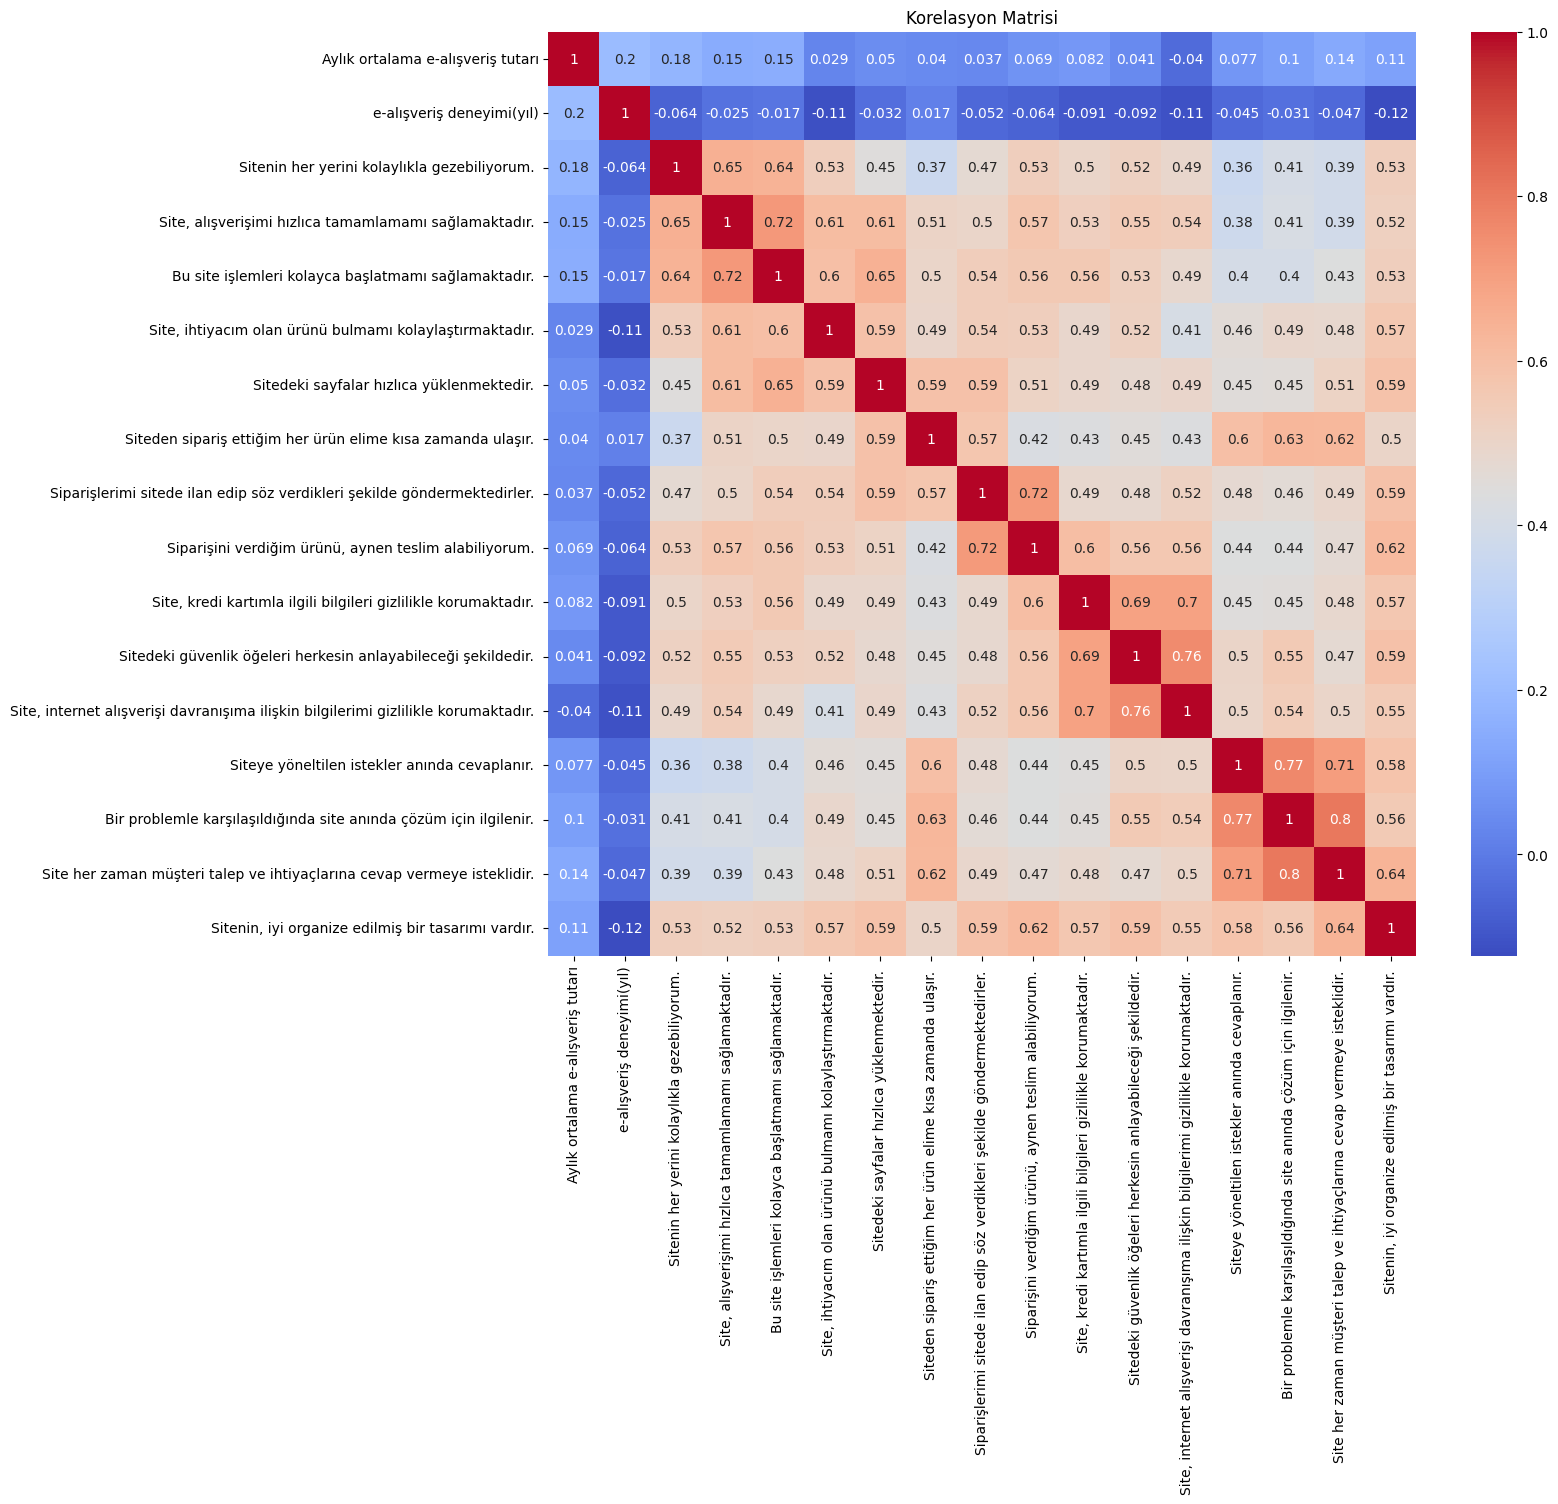

In [22]:
numeric_data = data.select_dtypes(include=['number'])  # Sadece sayısal sütunları içersin
korelasyon_matrisi = numeric_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(korelasyon_matrisi, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()


## Ki-Kare testi ile çapraz tablolar

In [23]:
# Tüm kategorik sütunlar
kategorik_sutunlar = data.select_dtypes(include=["object"])

# Her iki sütun arasındaki çapraz tabloyu oluşturun ve chi-kare testini uygulama
for col1 in kategorik_sutunlar.columns:
    for col2 in kategorik_sutunlar.columns:
        if col1 != col2:
            cross_table = pd.crosstab(data[col1], data[col2])
            chi2, p, _, _ = chi2_contingency(cross_table)
            print(f"{col1} ve {col2} arasındaki ilişki:")
            print("Chi-kare İstatistiği:", chi2)
            print("p-değeri:", p)
            alpha = 0.05  # Anlamlılık seviyesi
            if p < alpha:
                print("İki değişken arasında anlamlı bir ilişki vardır.")
            else:
                print("İki değişken arasında anlamlı bir ilişki yoktur.")
            print("\n")

Cinsiyet ve Yaş arasındaki ilişki:
Chi-kare İstatistiği: 25.383822332462373
p-değeri: 0.008007031446510753
İki değişken arasında anlamlı bir ilişki vardır.


Cinsiyet ve Medeni Durum arasındaki ilişki:
Chi-kare İstatistiği: 1.015406316226432
p-değeri: 0.31361112755369497
İki değişken arasında anlamlı bir ilişki yoktur.


Cinsiyet ve Çalışma Durumu arasındaki ilişki:
Chi-kare İstatistiği: 53.9483797203598
p-değeri: 2.1476523935095068e-10
İki değişken arasında anlamlı bir ilişki vardır.


Cinsiyet ve Öğrenim Durumu arasındaki ilişki:
Chi-kare İstatistiği: 19.407933376594848
p-değeri: 0.0035273971212461696
İki değişken arasında anlamlı bir ilişki vardır.


Cinsiyet ve En Çok Satın Alınan Ürün Grubu arasındaki ilişki:
Chi-kare İstatistiği: 59.88155126450093
p-değeri: 3.0719741404399064e-12
İki değişken arasında anlamlı bir ilişki vardır.


Cinsiyet ve e-alışveriş yapma sıklığı arasındaki ilişki:
Chi-kare İstatistiği: 3.366701459648423
p-değeri: 0.33846641591383997
İki değişken arasında anl

En son satın alınan ürün grubu ve Yaş arasındaki ilişki:
Chi-kare İstatistiği: 64.24662232973488
p-değeri: 0.024781558012903993
İki değişken arasında anlamlı bir ilişki vardır.


En son satın alınan ürün grubu ve Medeni Durum arasındaki ilişki:
Chi-kare İstatistiği: 8.834256852554052
p-değeri: 0.06537845154608318
İki değişken arasında anlamlı bir ilişki yoktur.


En son satın alınan ürün grubu ve Çalışma Durumu arasındaki ilişki:
Chi-kare İstatistiği: 61.74520759017641
p-değeri: 3.8108920350239272e-06
İki değişken arasında anlamlı bir ilişki vardır.


En son satın alınan ürün grubu ve Öğrenim Durumu arasındaki ilişki:
Chi-kare İstatistiği: 56.69181824889335
p-değeri: 0.00018435698294589712
İki değişken arasında anlamlı bir ilişki vardır.


En son satın alınan ürün grubu ve En Çok Satın Alınan Ürün Grubu arasındaki ilişki:
Chi-kare İstatistiği: 370.9313895151348
p-değeri: 4.418768811607999e-69
İki değişken arasında anlamlı bir ilişki vardır.


En son satın alınan ürün grubu ve e-alışver